--- 

### DSGA1007

--- 

### HW06 

### Due Date: Friday 2021-11-26, 8PM


#### Student Name:  Seonhye Yang

#### Student NetID: sy3420

**Problem 1 (100 points)** 

In this problem we examine, by using `pandas`, the provided data in the form of time-series: "Electricity production and consumption are reported as daily totals in gigawatt-hours (GWh)". 
    
    
The columns of the data set are:

```Date — The date (yyyy-mm-dd format)
Consumption — Electricity consumption in GWh
Wind — Wind power production in GWh
Solar — Solar power production in GWh
Wind+Solar — Sum of wind and solar power production in GWh ```   

**1.1 (10 points)** Import the data set by using `pandas` from the given csv file.

As in the lecture, set `index_col=Date` and `parse_dates=True`, so to set indexes as `Date`.

Call this data set `data`.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import math

In [24]:
a = [1, 2, 3, 4, 5]
np.max(a)

5

**1.2 (5 points)** Display first 10 rows of the data frame

In [64]:
data = pd.read_csv("opsd_daily.csv", index_col = 'Date', parse_dates= True)
data[:10]

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN
2006-01-06,1403.427,NaN,NaN,NaN
2006-01-07,1300.287,NaN,NaN,NaN
2006-01-08,1207.985,NaN,NaN,NaN
2006-01-09,1529.323,NaN,NaN,NaN


**1.3 (5 points)** Display last 10 rows of the data frame

In [17]:
data.tail(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-22,1423.23782,228.773,10.065,238.838
2017-12-23,1272.17085,748.074,8.450,756.524
2017-12-24,1141.75730,812.422,9.949,822.371
2017-12-25,1111.28338,587.810,15.765,603.575
2017-12-26,1130.11683,717.453,30.923,748.376
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714


**1.4 (5 points)** Use `describe` to describe data.

In [19]:
data.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


**1.5 (5 points)** Create a new data frame by dropping all `na` values.

In [22]:
data_dropna = data.dropna()
data_dropna

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2012-01-01,948.12800,227.465,6.587,234.052
2012-01-02,1269.58100,207.327,6.574,213.901
2012-01-03,1334.74500,473.468,24.679,498.147
2012-01-04,1347.13600,499.804,14.681,514.485
2012-01-05,1376.65800,523.851,5.071,528.922
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


**1.6 (5 points)** Use `describe` to describe `data_dropna`:

In [23]:
data_dropna.describe()

,Consumption,Wind,Solar,Wind+Solar
count,2187.000000,2187.000000,2187.000000,2187.000000
mean,1347.519037,183.431878,89.231604,272.663481
std,166.551363,153.390542,58.549772,146.319884
min,899.827000,6.511000,1.968000,21.478000
25%,1222.042000,72.367000,35.161500,172.185500
50%,1380.220000,136.842000,86.390000,240.991000
75%,1460.072500,245.027500,135.038000,338.988000
max,1682.002000,826.278000,241.580000,851.556000


**1.7 (5 points)** Get all the keys of `data`, which we will here also call column names or features:
    

In [24]:
data.keys()

Index(['Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

**1.8 (10 points)** For every of the features, plot its values over time

Note: Please use the original data frame (with the all na values) for visualization. Also, separate plots or one plot are both fine.

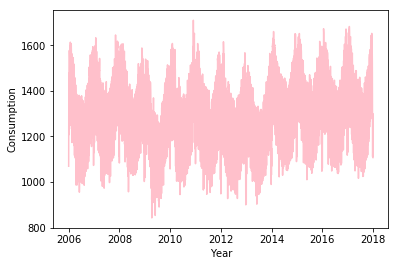

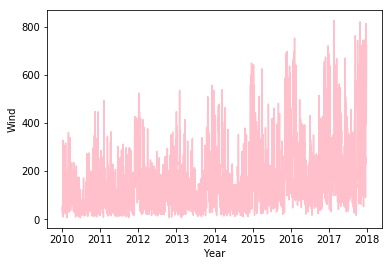

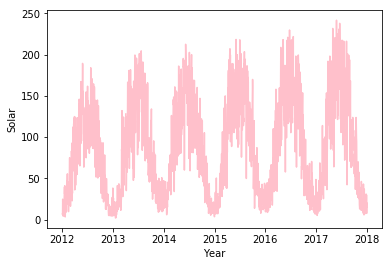

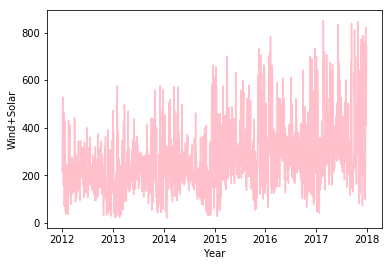

In [101]:
for feature in data:
    plt.figure()
    plt.plot(data[feature], color = "pink")
    plt.xlabel("Year")
    plt.ylabel(f"{feature}")
    plt.show()

**1.9 (10 points)** Group-by and average the input data over years. Plot and describe such a data frame. Call that data frame `data_y`.

Note: use the original data frame (with the all na values). Also in order to "describe" the data frame use the describe function.

In [60]:
data_y = data.groupby(data.index.year).mean()
data_y

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006,1339.913797,NaN,NaN,NaN
2007,1360.635197,NaN,NaN,NaN
2008,1354.018787,NaN,NaN,NaN
2009,1259.554597,NaN,NaN,NaN
2010,1338.599178,98.388430,NaN,NaN
2011,1328.257770,120.969646,NaN,NaN
2012,1282.991131,125.307833,76.194896,201.502730
2013,1269.416036,129.309129,81.431901,211.287722
2014,1381.273482,140.405692,89.527017,230.305254


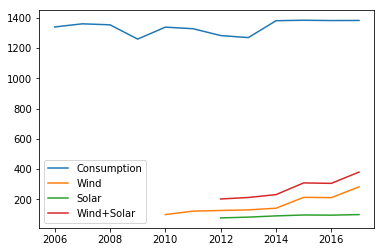

In [80]:
plt.figure()
plt.plot(data_y)
plt.legend(data_y)
plt.show()

In [92]:
data_y.describe()

,Consumption,Wind,Solar,Wind+Solar
count,12.000000,8.000000,6.000000,6.000000
mean,1338.675083,164.788715,89.255394,272.567207
std,45.462542,62.842562,8.733242,69.761755
min,1259.554597,98.388430,76.194896,201.502730
25%,1316.941110,124.223286,83.455680,216.042105
50%,1346.966292,134.857411,91.980481,267.571958
75%,1381.533905,210.864492,95.335482,307.119526
max,1384.286474,281.280452,98.308611,379.589063


**1.10 (10 points)** Group-by and average the input data over months. Plot and describe such a data frame. Call that data frame `data_m`.

Note: use the original data frame (with the all na values). Also in order to "describe" the data frame use the describe function.

In [61]:
data_m = data.groupby(data.index.month).mean()
data_m

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
1,1433.781435,207.716480,19.569602,260.175301
2,1452.463841,206.942903,43.846735,271.954265
3,1380.694497,174.218785,88.038121,283.819039
4,1298.457644,148.644725,119.734933,282.360956
5,1261.905065,129.161601,139.967312,282.497296
6,1263.169508,114.812058,152.569494,282.270861
7,1266.701788,112.376440,150.746720,272.875124
8,1249.991327,109.350778,138.778575,256.876242
9,1314.348716,127.731125,103.247256,241.696133


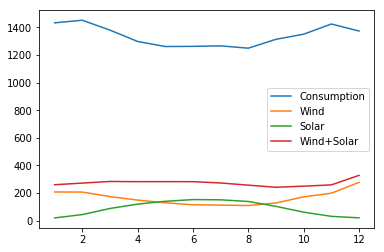

In [79]:
plt.figure()
plt.plot(data_m)
plt.legend(data_m)
plt.show()

In [93]:
data_m.describe()

,Consumption,Wind,Solar,Wind+Solar
count,12.000000,12.000000,12.000000,12.000000
mean,1339.373098,164.980810,89.063732,272.615320
std,73.560631,51.231107,52.078324,22.464881
min,1249.991327,109.350778,19.569602,241.696133
25%,1265.818718,124.501358,40.602332,258.472610
50%,1332.877657,160.479451,95.642688,272.414694
75%,1391.818921,200.936313,139.075759,282.395041
max,1452.463841,277.566526,152.569494,328.065392


**1.11 (10 points)** Group-by and average the input data over days. Plot and describe such a data frame. Call that data frame `data_d`.

Note: use the original data frame (with the all na values). Also in order to "describe" the data frame use the describe function.

In [62]:
data_d = data.groupby(data.index.day).mean()
data_d

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
1,1282.221089,163.250094,88.110639,267.364403
2,1328.787684,170.430865,89.258931,281.844097
3,1324.659435,164.034771,89.773583,270.362597
4,1345.006370,167.976063,90.374042,275.359139
5,1340.536092,159.516250,88.851000,259.445444
6,1343.083543,168.722917,93.027653,276.637347
7,1353.445942,175.151583,91.949694,285.910347
8,1351.742893,176.533979,90.853653,283.140347
9,1349.313588,178.335406,88.183028,287.336958


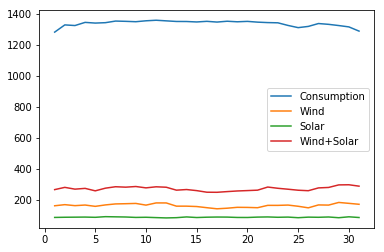

In [86]:
plt.figure()
plt.plot(data_d)
plt.legend(data_d)
plt.show()

In [94]:
data_d.describe()

,Consumption,Wind,Solar,Wind+Solar
count,31.000000,31.000000,31.000000,31.000000
mean,1337.914721,165.004022,89.239130,273.053110
std,18.899687,10.812232,1.922027,13.127479
min,1282.221089,143.728042,84.980486,250.086389
25%,1327.049849,158.924396,87.887535,262.274660
50%,1345.006370,165.916052,89.258931,275.359139
75%,1351.188386,171.635209,90.487208,282.925420
max,1358.771187,184.663811,93.027653,298.629125


**1.12 (15 points)** For each of the above frames `data_y`, `data_m`, `data_d`, consider their features `['Consumption', 'Wind', 'Solar', 'Wind+Solar']`.  For each of these, calculate `min`, `max` and  indexes at which `min` and `max` are attained.




In [102]:
print("Year")
print("    Min")
print(np.min(data_y))
print(data_y.idxmin())
print("    Max")
print(np.max(data_y))
print(data_y.idxmax())

Year
    Min
Consumption    1259.554597
Wind             98.388430
Solar            76.194896
Wind+Solar      201.502730
dtype: float64
Consumption    2009
Wind           2010
Solar          2012
Wind+Solar     2012
dtype: int64
    Max
Consumption    1384.286474
Wind            281.280452
Solar            98.308611
Wind+Solar      379.589063
dtype: float64
Consumption    2015
Wind           2017
Solar          2017
Wind+Solar     2017
dtype: int64


In [96]:
print("Month")
print("    Min")
print(np.min(data_m))
print(data_m.idxmin())
print("    Max")
print(np.max(data_m))
print(data_m.idxmax())

Month
    Min
Consumption    1249.991327
Wind            109.350778
Solar            19.569602
Wind+Solar      241.696133
dtype: float64
Consumption    8
Wind           8
Solar          1
Wind+Solar     9
dtype: int64
    Max
Consumption    1452.463841
Wind            277.566526
Solar           152.569494
Wind+Solar      328.065392
dtype: float64
Consumption     2
Wind           12
Solar           6
Wind+Solar     12
dtype: int64


In [97]:
print("Day")
print("    Min")
print(np.min(data_d))
print(data_d.idxmin())
print("    Max")
print(np.max(data_d))
print(data_d.idxmax())

Day
    Min
Consumption    1282.221089
Wind            143.728042
Solar            84.980486
Wind+Solar      250.086389
dtype: float64
Consumption     1
Wind           17
Solar          12
Wind+Solar     17
dtype: int64
    Max
Consumption    1358.771187
Wind            184.663811
Solar            93.027653
Wind+Solar      298.629125
dtype: float64
Consumption    11
Wind           29
Solar           6
Wind+Solar     30
dtype: int64


**1.13 (5 points)** For which month the average consumption is lowest, and for which one is the highest?

In [90]:
print(data_m["Consumption"].min())
print(data_m["Consumption"].idxmin())
print("For Consumption, August had the lowest average.")

1249.991327096774
8
For Consumption, August had the lowest average


In [91]:
print(data_m["Consumption"].max())
print(data_m["Consumption"].idxmax())
print("For Consumption, February had the highest average.")

1452.4638407079644
2
For Consumption, February had the highest average.
